<a href="https://colab.research.google.com/github/jayuan101/Predicting-Stock/blob/main/Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

In [2]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [3]:
!pip install tensorflow

In [4]:
!pip install pandas-datareader

In [5]:
import numpy as np
import pandas as pd
import streamlit as st
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
# For time stamps
from datetime import datetime
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py
py.init_notebook_mode()
# stocks related missing info
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [6]:
st.write ("""#Shown are the stock closing price and vloumn of AT&T Apple Amazon Nike Google Mircosoft """)

2024-08-18 02:20:43.270 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


In [7]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN','SATS']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN','SATS']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [8]:
company_list = [AAPL, GOOG, MSFT, AMZN, SATS]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON", "Echostar Corp"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name



df = pd.concat(company_list, axis=0)
df.tail

<bound method NDFrame.tail of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-08-18  172.300003  175.100006  171.960007  174.490005  173.601669   
2023-08-21  175.070007  176.130005  173.740005  175.839996  174.944794   
2023-08-22  177.059998  177.679993  176.250000  177.229996  176.327698   
2023-08-23  178.520004  181.550003  178.330002  181.119995  180.197922   
2023-08-24  180.669998  181.100006  176.009995  176.380005  175.482040   
...                ...         ...         ...         ...         ...   
2024-08-12   16.010000   16.129999   14.790000   15.500000   15.500000   
2024-08-13   15.470000   17.469999   15.310000   17.450001   17.450001   
2024-08-14   17.590000   17.639999   16.790001   17.389999   17.389999   
2024-08-15   17.780001   18.059999   17.680000   17.809999   17.809999   
2024-08-16   17.790001   18.110001   17.520000   17.950001   17.950001   

              Volume   company_name  
Date                                 
2023-08-18  61114200          APPLE  
2023-08-21  46311900          APPLE  
2023-08-22  42084200          APPLE  
2023-08-23  52722800          APPLE  
2023-08-24  54945800          APPLE  
...              ...            ...  
2024-08-12   2787800  Echostar Corp  
2024-08-13   2024800  Echostar Corp  
2024-08-14    938200  Echostar Corp  
2024-08-15    890700  Echostar Corp  
2024-08-16    742900  Echostar Corp  

[1255 rows x 7 columns]>

In [9]:
company_list = [AAPL, GOOG, MSFT, AMZN, SATS]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON","Echostar Corp."]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.head

<bound method NDFrame.head of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-08-18  172.300003  175.100006  171.960007  174.490005  173.601669   
2023-08-21  175.070007  176.130005  173.740005  175.839996  174.944794   
2023-08-22  177.059998  177.679993  176.250000  177.229996  176.327698   
2023-08-23  178.520004  181.550003  178.330002  181.119995  180.197922   
2023-08-24  180.669998  181.100006  176.009995  176.380005  175.482040   
...                ...         ...         ...         ...         ...   
2024-08-12   16.010000   16.129999   14.790000   15.500000   15.500000   
2024-08-13   15.470000   17.469999   15.310000   17.450001   17.450001   
2024-08-14   17.590000   17.639999   16.790001   17.389999   17.389999   
2024-08-15   17.780001   18.059999   17.680000   17.809999   17.809999   
2024-08-16   17.790001   18.110001   17.520000   17.950001   17.950001   

              Volume    company_name  
Date                                  
2023-08-18  61114200           APPLE  
2023-08-21  46311900           APPLE  
2023-08-22  42084200           APPLE  
2023-08-23  52722800           APPLE  
2023-08-24  54945800           APPLE  
...              ...             ...  
2024-08-12   2787800  Echostar Corp.  
2024-08-13   2024800  Echostar Corp.  
2024-08-14    938200  Echostar Corp.  
2024-08-15    890700  Echostar Corp.  
2024-08-16    742900  Echostar Corp.  

[1255 rows x 7 columns]>

In [10]:
# Summary Stats
AAPL.describe()

Open        High         Low       Close   Adj Close  \
count  251.000000  251.000000  251.000000  251.000000  251.000000   
mean   188.489801  190.280718  186.916693  188.695976  188.138581   
std     16.942309   17.247837   16.572596   16.946170   17.087128   
min    165.350006  166.399994  164.080002  165.000000  164.585999   
25%    175.244995  177.025002  173.764999  175.475006  174.630730   
50%    185.320007  186.740005  183.529999  185.559998  184.858521   
75%    194.360001  195.370003  193.070000  194.220001  193.650169   
max    236.479996  237.229996  233.089996  234.820007  234.548523   

             Volume  
count  2.510000e+02  
mean   6.042113e+07  
std    2.481799e+07  
min    2.404830e+07  
25%    4.664900e+07  
50%    5.376350e+07  
75%    6.598470e+07  
max    2.464214e+08

In [11]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-08-18 to 2024-08-16
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


In [12]:
# Summary Stats
GOOG.describe()

Open        High         Low       Close   Adj Close  \
count  251.000000  251.000000  251.000000  251.000000  251.000000   
mean   151.505989  153.082283  150.185398  151.697769  151.563854   
std     18.230495   18.395392   18.100544   18.212474   18.247027   
min    124.029999  124.440002  121.459999  123.400002  123.259735   
25%    137.032501  138.620003  135.899994  137.275002  137.118965   
50%    144.460007  145.839996  143.350006  144.339996  144.175934   
75%    168.480003  169.884995  165.812500  168.570000  168.539993   
max    191.750000  193.309998  190.619995  192.660004  192.660004   

             Volume  
count  2.510000e+02  
mean   2.092039e+07  
std    8.205900e+06  
min    7.409100e+06  
25%    1.632155e+07  
50%    1.874050e+07  
75%    2.291945e+07  
max    5.972800e+07

In [13]:
# General info
GOOG.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-08-18 to 2024-08-16
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


In [14]:
# Summary Stats
MSFT.describe()

Open        High         Low       Close   Adj Close  \
count  251.000000  251.000000  251.000000  251.000000  251.000000   
mean   391.114223  394.169683  387.707808  391.180319  389.492777   
std     40.698864   40.735364   40.421773   40.676209   41.227107   
min    310.989990  314.299988  309.450012  312.140015  309.814545   
25%    368.225006  371.525009  365.759995  368.369995  366.367676   
50%    404.029999  407.149994  401.260010  403.779999  401.734406   
75%    420.529999  424.054993  417.434998  420.854996  419.674194   
max    467.000000  468.350006  464.459991  467.559998  466.718781   

             Volume  
count  2.510000e+02  
mean   2.219129e+07  
std    8.024373e+06  
min    9.932800e+06  
25%    1.704385e+07  
50%    2.060370e+07  
75%    2.490675e+07  
max    7.847820e+07

In [15]:
MSFT.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-08-18 to 2024-08-16
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


In [16]:
# Summary Stats
AMZN.describe()

Open        High         Low       Close   Adj Close  \
count  251.000000  251.000000  251.000000  251.000000  251.000000   
mean   162.717291  164.428924  160.915936  162.785618  162.785618   
std     21.849003   21.905891   21.579401   21.679158   21.679158   
min    120.629997  121.639999  118.349998  119.570000  119.570000   
25%    143.730003  145.290001  142.564995  144.545006  144.545006   
50%    168.740005  170.550003  167.100006  169.149994  169.149994   
75%    181.724998  183.989998  179.974998  181.495003  181.495003   
max    200.089996  201.199997  199.050003  200.000000  200.000000   

             Volume  
count  2.510000e+02  
mean   4.613452e+07  
std    1.677271e+07  
min    2.237840e+07  
25%    3.527765e+07  
50%    4.283290e+07  
75%    5.103865e+07  
max    1.414484e+08

In [17]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-08-18 to 2024-08-16
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


In [18]:
SATS.describe()

Open        High         Low       Close   Adj Close  \
count  251.000000  251.000000  251.000000  251.000000  251.000000   
mean    15.442550   15.873944   15.069084   15.475259   15.475259   
std      2.697678    2.710407    2.691568    2.689635    2.689635   
min      9.880000   10.110000    9.530000    9.680000    9.680000   
25%     13.480000   13.865000   13.145000   13.540000   13.540000   
50%     15.120000   15.590000   14.510000   15.240000   15.240000   
75%     17.780001   18.190001   17.395000   17.800000   17.800000   
max     20.450001   20.860001   20.080000   20.330000   20.330000   

             Volume  
count  2.510000e+02  
mean   1.502621e+06  
std    1.883995e+06  
min    1.069000e+05  
25%    6.808500e+05  
50%    1.121400e+06  
75%    1.587200e+06  
max    1.813380e+07

In [19]:
SATS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-08-18 to 2024-08-16
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


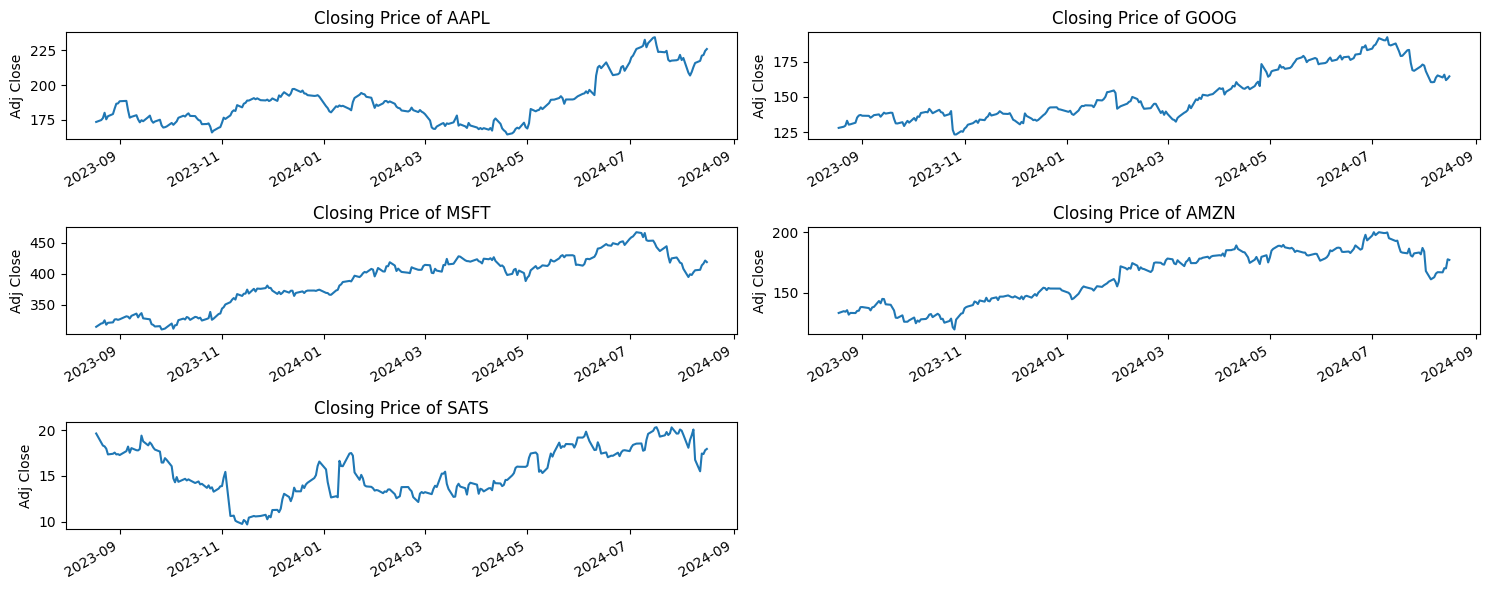

In [20]:
# Let's see a historical view of the closing price


plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

# Adjust the figure layout to accommodate all companies
num_companies = len(company_list)
num_rows = (num_companies + 1) // 2  # Calculate the number of rows needed
num_cols = 2

for i, company in enumerate(company_list, 1):
    plt.subplot(num_rows, num_cols, i)  # Use calculated rows
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

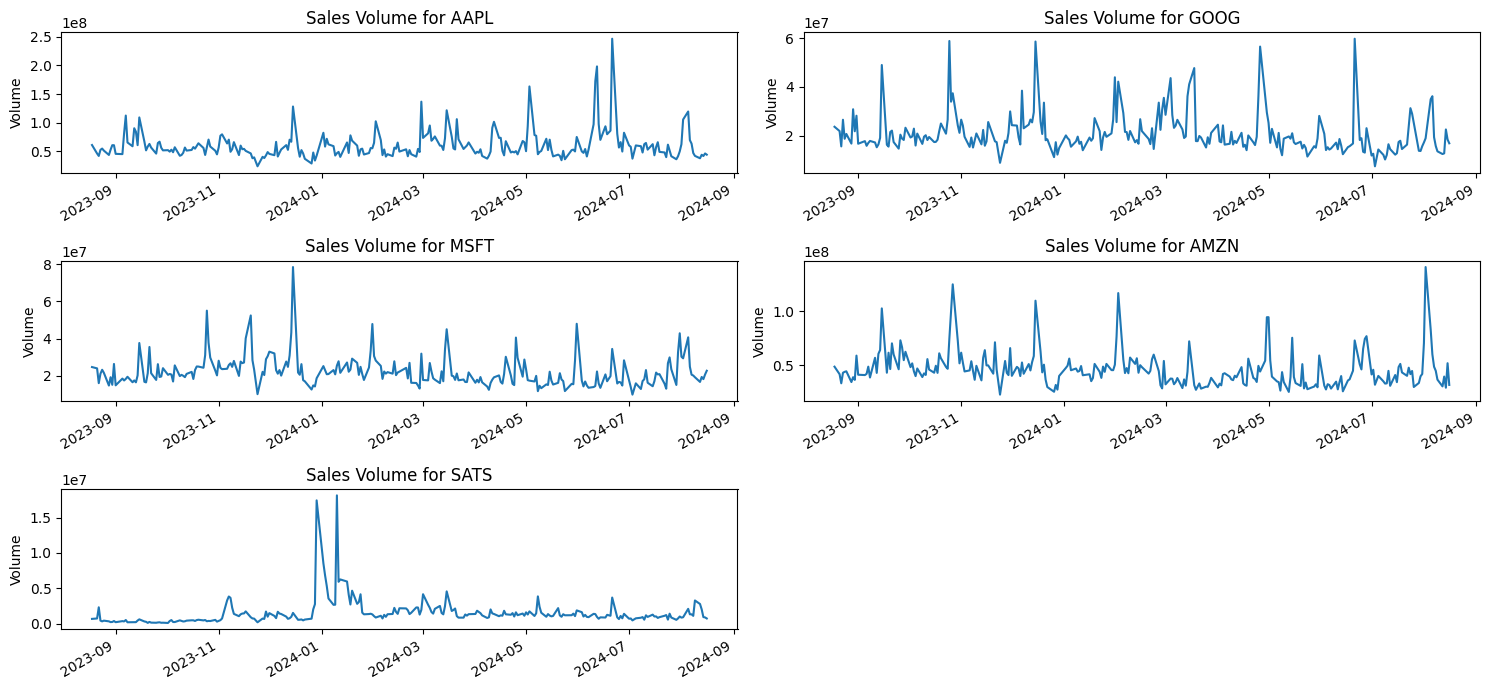

In [21]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

# Adjust the subplot grid to accommodate 5 companies
num_rows = 3
num_cols = 2

for i, company in enumerate(company_list, 1):
    plt.subplot(num_rows, num_cols, i)  # Use the adjusted grid
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

In [22]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

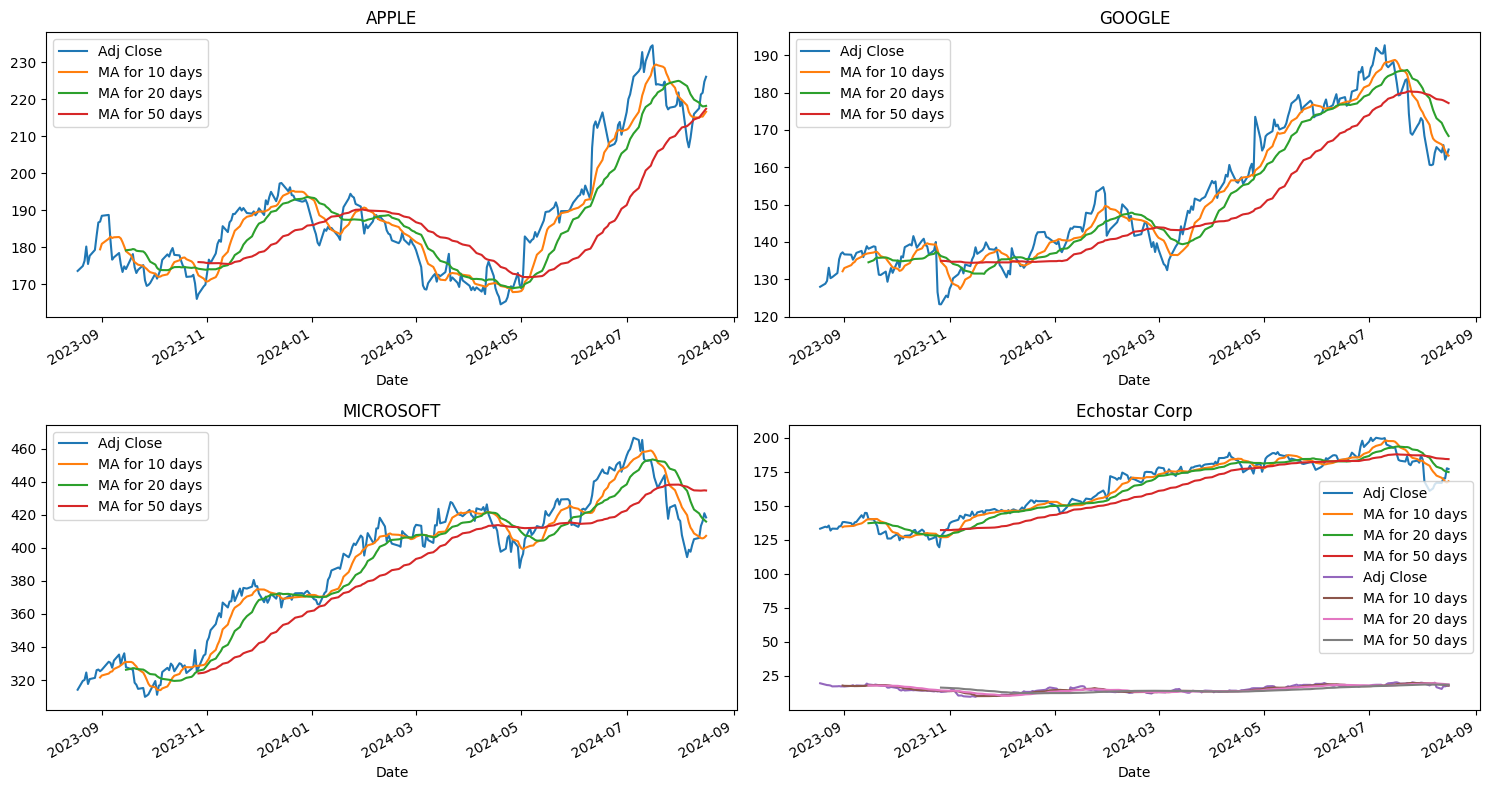

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

SATS[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('Echostar Corp')
fig.tight_layout()

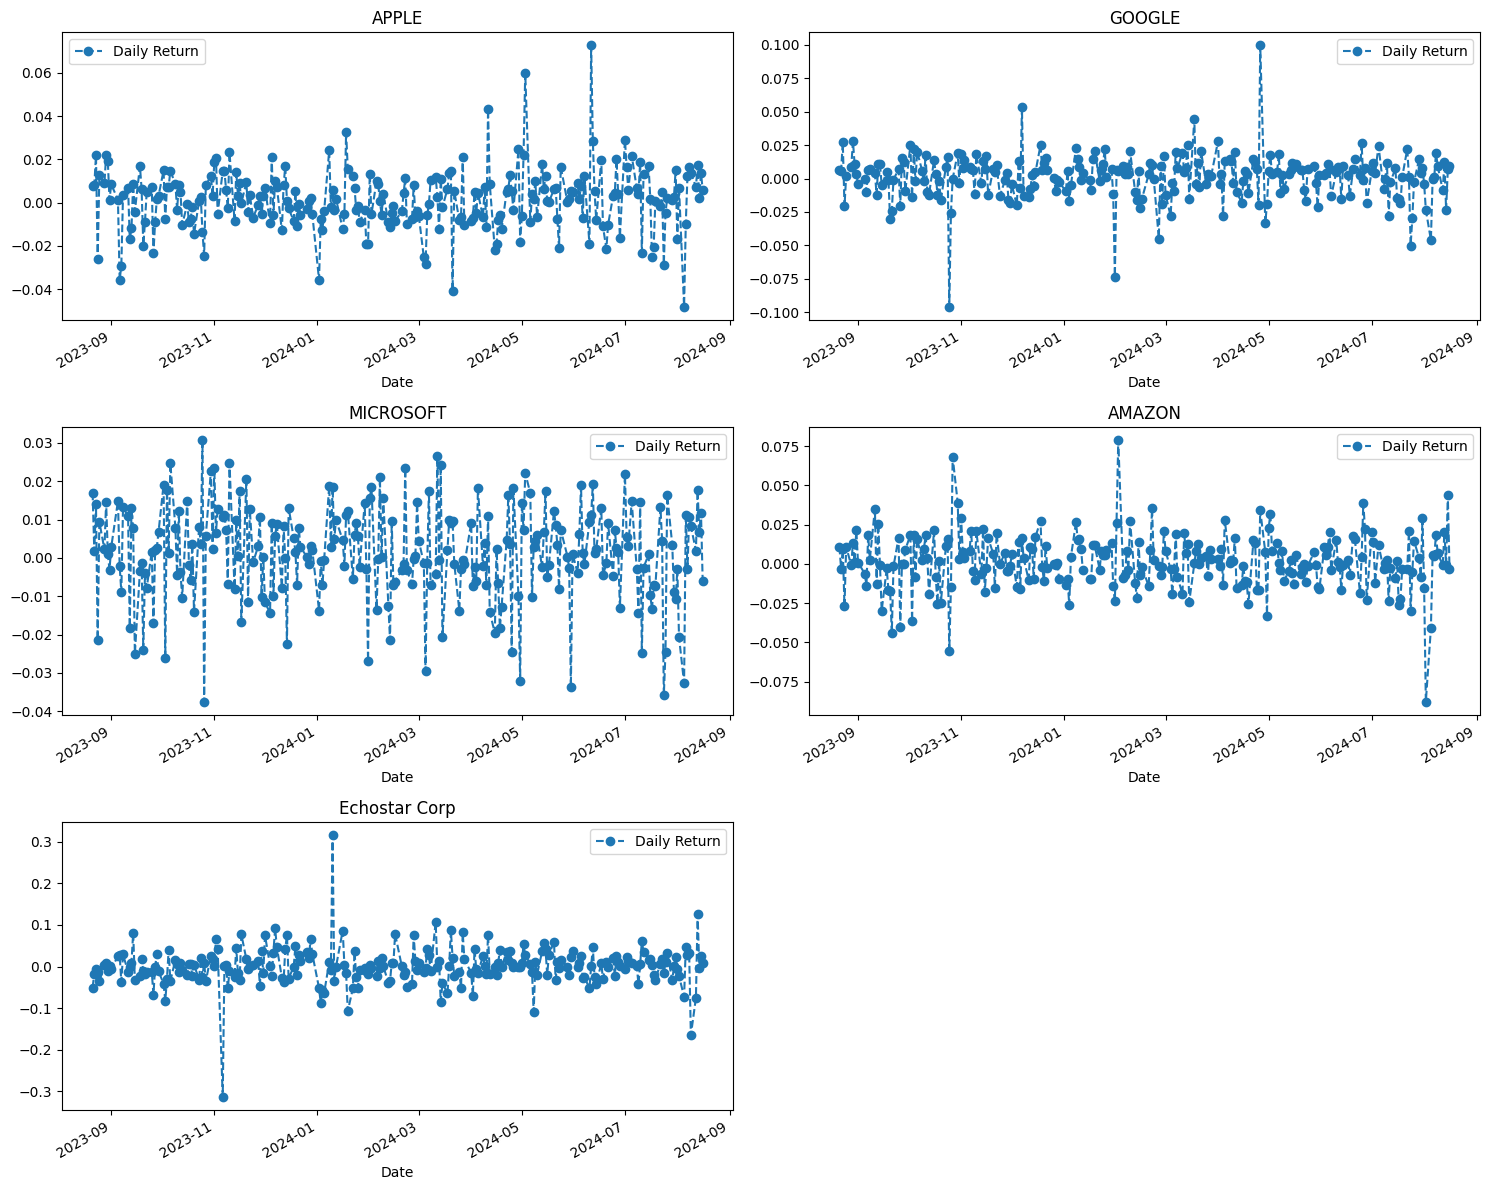

In [26]:
# Calculate daily returns for each company if you haven't already
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

import matplotlib.pyplot as plt

# Assuming you have already calculated the daily returns
# And that company_list contains all five companies

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))

AAPL['Daily Return'].plot(ax=axes[0, 0], legend=True, linestyle='--', marker='o')
axes[0, 0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0, 1], legend=True, linestyle='--', marker='o')
axes[0, 1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1, 0], legend=True, linestyle='--', marker='o')
axes[1, 0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1, 1], legend=True, linestyle='--', marker='o')
axes[1, 1].set_title('AMAZON')

SATS['Daily Return'].plot(ax=axes[2, 0], legend=True, linestyle='--', marker='o')
axes[2, 0].set_title('Echostar Corp')

# Hide the unused subplot (bottom right)
fig.delaxes(axes[2, 1])

fig.tight_layout()
plt.show()

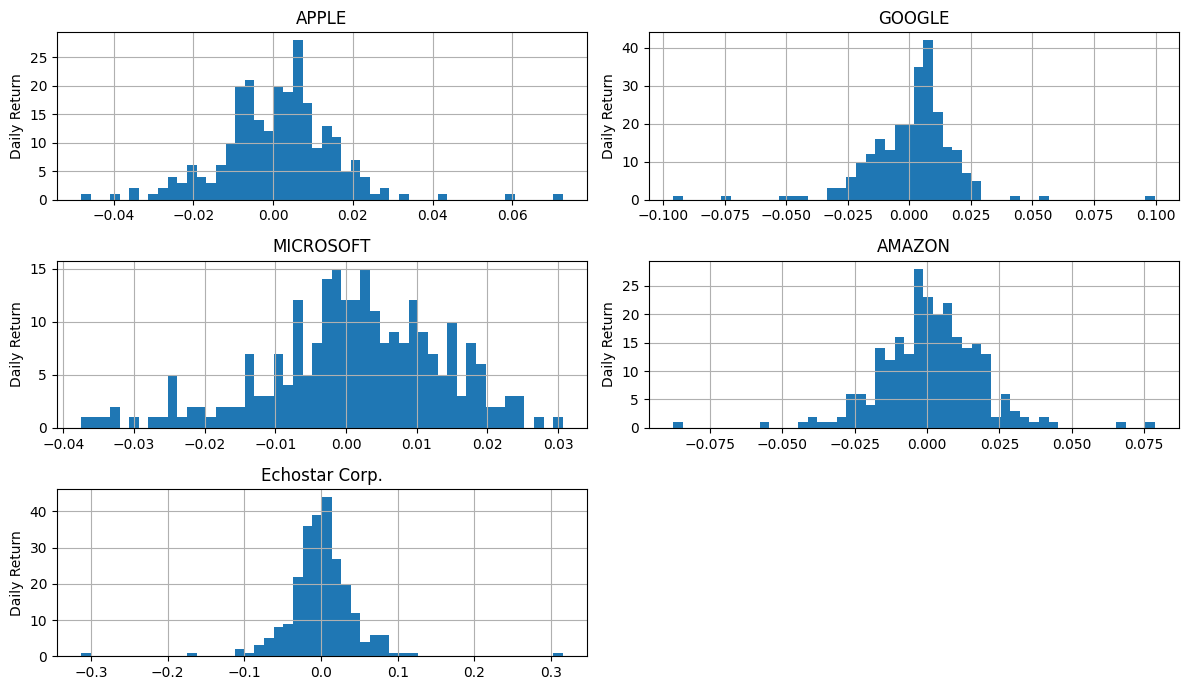

In [27]:
plt.figure(figsize=(12, 7))

# Adjust the subplot grid to accommodate 5 companies
num_rows = 3
num_cols = 2

for i, company in enumerate(company_list, 1):
    plt.subplot(num_rows, num_cols, i) # Updated grid layout
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [28]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

922
231


In [29]:
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - loss: 0.1806 - mae: 0.3087 - mse: 0.1806 - val_loss: 0.0454 - val_mae: 0.1447 - val_mse: 0.0454
Epoch 2/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0480 - mae: 0.1421 - mse: 0.0480 - val_loss: 0.0340 - val_mae: 0.1188 - val_mse: 0.0340
Epoch 3/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0404 - mae: 0.1251 - mse: 0.0404 - val_loss: 0.0217 - val_mae: 0.0847 - val_mse: 0.0217
Epoch 4/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0269 - mae: 0.0990 - mse: 0.0269 - val_loss: 0.0195 - val_mae: 0.0791 - val_mse: 0.0195
Epoch 5/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0290 - mae: 0.1063 - mse: 0.0290 - val_loss: 0.0169 - val_mae: 0.0693 - val_mse: 0.0169
Epoch 6/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.0248 - mae: 0.0974 - mse: 0.0248 - val_loss: 0.0175 - val_mae: 0.0748 - val_mse: 0.0175
Epoch 7/40
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0228 - mae: 0.0912 - mse: 0.0228 - val_loss:

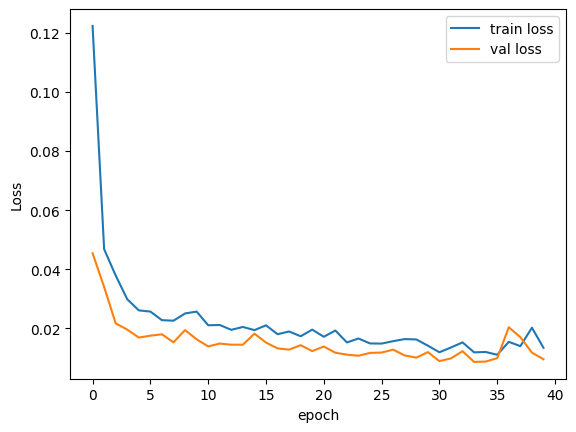

In [30]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

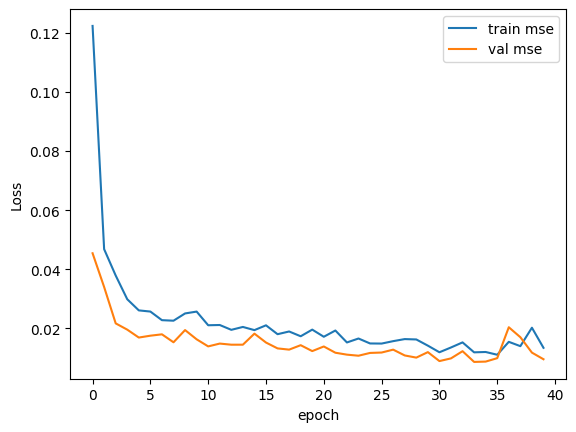

In [31]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed (TimeDistributed)   │ (None, 1, 98, 64)           │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, 1, 49, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_2 (TimeDistributed) │ (None, 1, 47, 128)          │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_3 (TimeDistributed) │ (None, 1, 23, 128)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_4 (TimeDistributed) │ (None, 1, 21, 64)           │          24,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_5 (TimeDistributed) │ (None, 1, 10, 64)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_6 (TimeDistributed) │ (None, 1, 640)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 1, 200)              │         592,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 200)                 │         240,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,650,205 (10.11 MB)

 Trainable params: 883,401 (3.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,766,804 (6.74 MB)

None


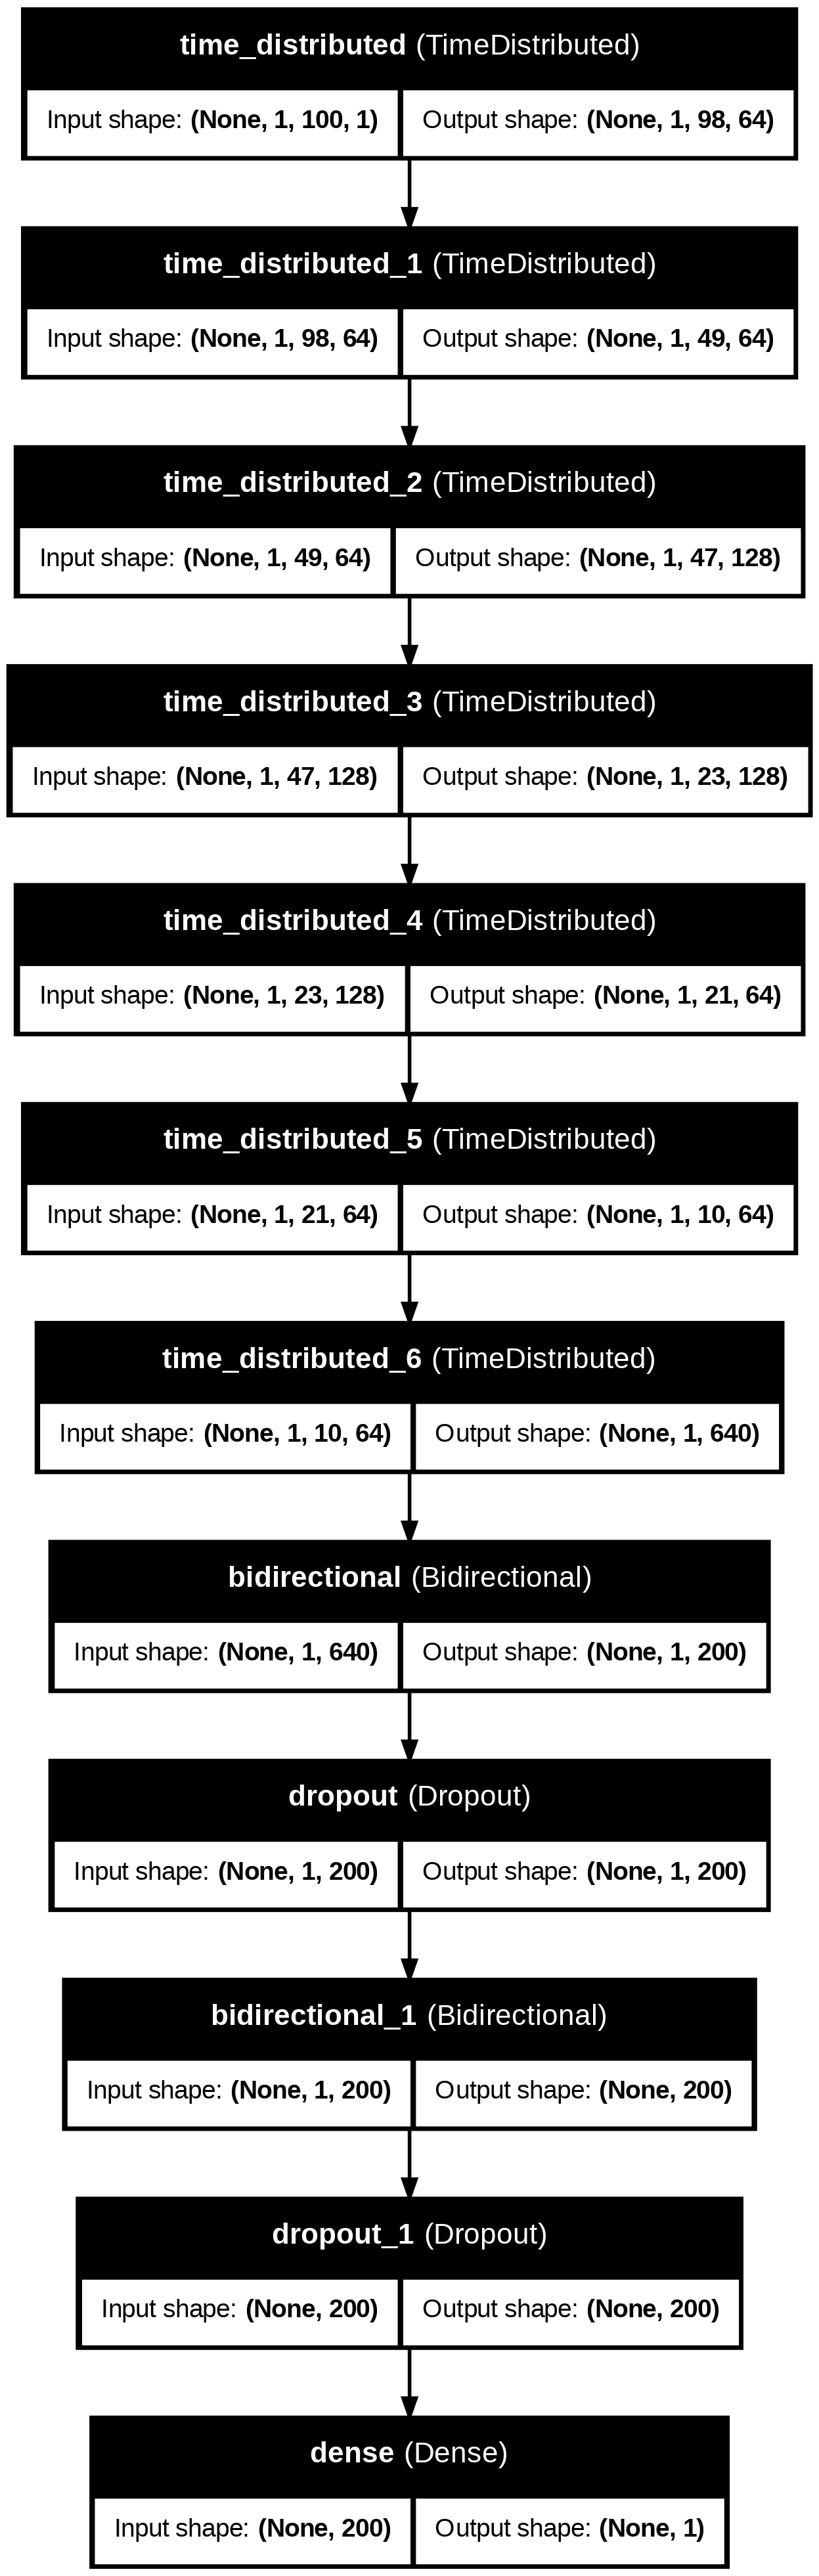

In [32]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [33]:
model.evaluate(test_X, test_Y)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0092 - mae: 0.0677 - mse: 0.0092


[0.009521269239485264, 0.009521269239485264, 0.06901700794696808]

In [34]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.960584
R2 Score: 0.960584
Max Error: 0.571355
